In [2]:
!wget https://www.dropbox.com/sh/xh8rdvrvkak3diz/AAD2vtlsi4-BrwBnSAyk__F5a?dl=1 -O train

--2020-07-07 10:10:53--  https://www.dropbox.com/sh/xh8rdvrvkak3diz/AAD2vtlsi4-BrwBnSAyk__F5a?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/xh8rdvrvkak3diz/AAD2vtlsi4-BrwBnSAyk__F5a [following]
--2020-07-07 10:10:53--  https://www.dropbox.com/sh/dl/xh8rdvrvkak3diz/AAD2vtlsi4-BrwBnSAyk__F5a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc107e9dfc2afff8303976f6d7d0.dl.dropboxusercontent.com/zip_download_get/AecItLR-7lgh9g_VUGPmDq4NyRdtGOZ8bmk5on4Q2doiAW5pL_JXLnuB1lKG19b1J_cFg0MX1zaJmGVaj8GdV1GYDUZBCjve-3XToSbjQs6DFA?dl=1 [following]
--2020-07-07 10:10:54--  https://uc107e9dfc2afff8303976f6d7d0.dl.dropboxusercontent.com/zip_download_get/AecItLR-7lgh9g_VUGPmDq4NyRdtGOZ8bmk5on4Q2doiAW5pL_JXLnuB1lKG19b1J_cFg0MX1zaJmGVaj

In [3]:
!wget https://www.dropbox.com/sh/eyl9ci8xzg7ta54/AAB6GD8bT6B8nj9LhlI0g3mXa?dl=1 -O test

--2020-07-07 10:11:04--  https://www.dropbox.com/sh/eyl9ci8xzg7ta54/AAB6GD8bT6B8nj9LhlI0g3mXa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/eyl9ci8xzg7ta54/AAB6GD8bT6B8nj9LhlI0g3mXa [following]
--2020-07-07 10:11:04--  https://www.dropbox.com/sh/dl/eyl9ci8xzg7ta54/AAB6GD8bT6B8nj9LhlI0g3mXa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc18c233fb95bcbaf32f7716cda7.dl.dropboxusercontent.com/zip_download_get/AeddZd_7JAtQaRV9Vy9XQPfvbh0PHRFKSy6pv6Rp8sd_U2iNUHeRXeoqxAIvou9nRyrNhbT4LB7nZKK7maSKHrk1747JMOvhIsa9-SAW8H4WdA?dl=1 [following]
--2020-07-07 10:11:05--  https://uc18c233fb95bcbaf32f7716cda7.dl.dropboxusercontent.com/zip_download_get/AeddZd_7JAtQaRV9Vy9XQPfvbh0PHRFKSy6pv6Rp8sd_U2iNUHeRXeoqxAIvou9nRyrNhbT4LB7nZKK7m

In [4]:
!unzip train -d Train/  # -d will create folder and add file in that folder

Archive:  train
mapname:  conversion of  failed
 extracting: Train/Train.csv         


In [5]:
!unzip test -d Test/

Archive:  test
mapname:  conversion of  failed
 extracting: Test/Test.csv           
 extracting: Test/Sample_submission.csv  


In [6]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
train = pd.read_csv('Train/Train.csv')
test = pd.read_csv('Test/Test.csv')

In [8]:
type(['review'][0])

str

In [9]:
test=test['review'].values

In [10]:
type(test[0])

str

In [11]:
test.shape

(10000,)

In [12]:
X_train=train['review'].values

In [13]:
X_train.shape

(40000,)

In [14]:
Y_train=[]
for x in train['label']:
  if x=='pos':
    Y_train.append(1)
  else:
    Y_train.append(0)

In [15]:
Y_train=np.array(Y_train)

In [16]:
Y_train[:7]

array([1, 1, 1, 1, 1, 1, 0])

In [17]:
Y_train.shape

(40000,)

In [18]:
X_train[1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [19]:
rev = "Hey for the delay of thr movie in review of the movie"

In [20]:
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
tokenizer = RegexpTokenizer(r'\w+')
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

def getstemmedReview(review):
  review = review.lower()
  review = review.replace("<br /><br />"," ")

  tokens = tokenizer.tokenize(review)

  new_tokens=[t for t in tokens if t not in en_stopwords]
  stemed_tokens = [ps.stem(token) for token in new_tokens]
  
  cleaned_review = ' '.join(stemed_tokens)
  return cleaned_review




#  ***this is for testing codes skip this starting from here***


In [23]:
print(getstemmedReview(rev))

hey delay thr movi review movi


In [24]:
print(X_train[1])
print(getstemmedReview(X_train[1]))

http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.
http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule


In [25]:
cv = CountVectorizer()


In [26]:
cv.fit_transform([getstemmedReview(X_train[1])])

<1x37 sparse matrix of type '<class 'numpy.int64'>'
	with 37 stored elements in Compressed Sparse Row format>

In [27]:
r=getstemmedReview(X_train[1])
len(r)

266

In [28]:
cv.vocabulary_

{'211772166650071408': 0,
 'alex': 1,
 'appeal': 2,
 'best': 3,
 'com': 4,
 'continu': 5,
 'distribut': 6,
 'docid': 7,
 'en': 8,
 'entertain': 9,
 'forgo': 10,
 'gladli': 11,
 'googl': 12,
 'hl': 13,
 'http': 14,
 'job': 15,
 'labor': 16,
 'like': 17,
 'manual': 18,
 'mass': 19,
 'opinion': 20,
 'opt': 21,
 'pleas': 22,
 'possibl': 23,
 'profit': 24,
 'rang': 25,
 'rule': 26,
 'stuie': 27,
 'tale': 28,
 'texa': 29,
 'tri': 30,
 'video': 31,
 'videoplay': 32,
 'view': 33,
 'want': 34,
 'work': 35,
 'write': 36}

In [29]:
x=[]
r1=getstemmedReview(X_train[0])
r2=getstemmedReview(X_train[1])
x.append(r1)
x.append(r2)

In [30]:
print(r1,"\n",r2)

matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take 
 http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule


In [31]:
cv.fit_transform(x)

<2x57 sparse matrix of type '<class 'numpy.int64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [32]:
dict_val= cv.vocabulary_

In [33]:
(dict_val)

{'1948': 0,
 '211772166650071408': 1,
 'alex': 2,
 'appeal': 3,
 'best': 4,
 'catylast': 5,
 'charg': 6,
 'china': 7,
 'com': 8,
 'continu': 9,
 'distribut': 10,
 'docid': 11,
 'en': 12,
 'entertain': 13,
 'film': 14,
 'forgo': 15,
 'gladli': 16,
 'googl': 17,
 'highli': 18,
 'hl': 19,
 'http': 20,
 'intellig': 21,
 'job': 22,
 'labor': 23,
 'like': 24,
 'love': 25,
 'magnific': 26,
 'manual': 27,
 'mass': 28,
 'matur': 29,
 'melodrama': 30,
 'opinion': 31,
 'oppurun': 32,
 'opt': 33,
 'perform': 34,
 'pleas': 35,
 'possibl': 36,
 'profit': 37,
 'rang': 38,
 'rule': 39,
 'see': 40,
 'simpli': 41,
 'stuie': 42,
 'stun': 43,
 'take': 44,
 'tale': 45,
 'texa': 46,
 'tri': 47,
 'triangl': 48,
 'unbelivebl': 49,
 'video': 50,
 'videoplay': 51,
 'view': 52,
 'want': 53,
 'wei': 54,
 'work': 55,
 'write': 56}

In [34]:
x[0]

'matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take'

In [35]:
xty=[dict_val[t] for t in x[0].split()]

In [36]:
(xty)

[29,
 21,
 18,
 6,
 30,
 49,
 14,
 7,
 0,
 54,
 54,
 43,
 34,
 5,
 25,
 48,
 41,
 43,
 32,
 40,
 26,
 14,
 44]

In [37]:
xt=[]

for i in x:
  xty=[dict_val[t] for t in i.split()]
  xt.append(xty)
  

In [38]:
x1=[]
x2=[]
r1=getstemmedReview(X_train[0])
r2=getstemmedReview(X_train[1])
x1.append(r1)
x2.append(r2)

In [39]:
x3=x1

In [40]:
x3.append(x2[0])

In [41]:
(x3,"\n","\n",x2,"\n","\n",x1) # we can see x2 is also changing to change in x3 as x3 is only taking address of x1 not copying it

(['matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
  'http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'],
 '\n',
 '\n',
 ['http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'],
 '\n',
 '\n',
 ['matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
  'http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl v

In [42]:
x1=[]
x2=[]
r1=getstemmedReview(X_train[0])
r2=getstemmedReview(X_train[1])
x1.append(r1)
x2.append(r2)

In [43]:
x3=x1.copy()

In [44]:
x3.append(x2[0])

In [45]:
(x3,"\n","\n",x2,"\n","\n",x1) # we can see now x2 is not changing to change in x3 as we copied x3 on the different address

(['matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
  'http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'],
 '\n',
 '\n',
 ['http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'],
 '\n',
 '\n',
 ['matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take'])

In [46]:
x1=[]
x2=[]
r1=getstemmedReview(X_train[0])
r2=getstemmedReview(X_train[1])
x1.append(r1)
x2.append(r2)

In [47]:
x3=x1+x2

In [48]:
x3

['matur intellig highli charg melodrama unbelivebl film china 1948 wei wei stun perform catylast love triangl simpli stun oppurun see magnific film take',
 'http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule']

# ***skip till here***

# final begins here

## now removing unwanted words using tokenizer,stopwords removal and stemming

In [49]:
X_train_cleaned=[]
for i in X_train:
  x=getstemmedReview(i)
  X_train_cleaned.append(x)

In [50]:
type(X_train_cleaned[0])

str

In [51]:
(X_train_cleaned[1])

'http video googl com videoplay docid 211772166650071408 hl en distribut tri opt mass appeal want best possibl view rang forgo profit continu manual labor job gladli entertain work view texa tale pleas write like like alex like stuie texa texa tale write opinion rule'

In [52]:
X_test_cleaned=[]
for i in test:
  x=getstemmedReview(i)
  X_test_cleaned.append(x)

In [53]:
len(X_test_cleaned)

10000

In [54]:
X_test_cleaned[0]

'rememb old kung fu movi use watch friday saturday late night babysitt thought charg well movi play exactli like one movi patsi kensit biggest claim fame love interest mel gibson charact lethal weapon 2 perform one reason never made big terribl actress lethal weapon 2 thought cute cute enough check movi includ love music love danc anoth big let obvious impress either attract eye soul scream turn play anoth cheap predict role done badli movi kensit star comedienn good one either work club franc cut homeland make ear bleed luck even wors french govern want throw expir visa mayb caught act get marri casanova freiss luck predict begin terribl way give movi neg rate 1 10 star rate'

## now creating vocabulary and switching text with index of vocabulary

In [55]:
X_total=X_train_cleaned + X_test_cleaned

In [56]:
len(X_total)

50000

In [57]:
cv=CountVectorizer()

In [58]:
cv.fit_transform(X_total)

<50000x72714 sparse matrix of type '<class 'numpy.int64'>'
	with 4688480 stored elements in Compressed Sparse Row format>

In [59]:
dict_values=cv.vocabulary_

In [60]:
len(dict_values)

72714

In [61]:
X_train_cleaned[4]

'stori two dog cat look way back home old wise golden retriev shadow young american bulldog chanc himalayan cat sassi flee ranch go wilder reunit famili homeward bound incred journey 1993 famili adventur direct duwayn dunham remak 1963 film movi got sequel three year later michael j fox perfect man voic chanc fox youth energi bring role salli field great voic work sassi amech fantast shadow veteran actor second last movi also visibl actor great kim greist play laura burnford seaver robert hay bob seaver benji thall play peter burnford veronica lauren hope burnford kevin chevalia jami seaver jean smart portray kate quit amaz watch pet tri surviv wilder see sassi taken river seem like goner bear scene exit funni chanc chanc big hungri bear meet porcupin look pain great fun whole famili'

In [62]:
demo = [dict_values[t] for t in X_train_cleaned[4].split()]   ## leave this cell it is to show that countvectrizer do not make vocab for length 1 string so we have to remove it see in next cell

KeyError: ignored

In [63]:
demo=[dict_values[t] for t in X_train_cleaned[4].split() if len(t)>1]

In [64]:
x_train_index=[]
max_length=0
j=0
t=0
for i in X_train_cleaned:
  t=t+1
  lenght=len(i.split())
  if lenght> max_length:
    j=t
    max_length=lenght
  xty=[dict_values[t] for t in i.split() if len(t)>1]
  x_train_index.append(xty)

In [65]:
len(X_train_cleaned[36689].split())

1435

In [66]:
max_length

1435

In [67]:
j

36690

In [68]:
X_train_cleaned[36689]

'match 1 tag team tabl match bubba ray spike dudley vs eddi guerrero chri benoit bubba ray spike dudley start thing tag team tabl match eddi guerrero chri benoit accord rule match oppon go tabl order get win benoit guerrero heat earli take turn hammer first spike bubba ray german suplex benoit bubba took wind dudley brother spike tri help brother refere restrain benoit guerrero gang corner benoit stomp away bubba guerrero set tabl outsid spike dash ring somersault top rope onto guerrero outsid recov take care spike guerrero slip tabl ring help wolverin set tandem set doubl superplex middl rope would put bubba tabl spike knock tabl right brother came crash guerrero benoit prop anoth tabl corner tri irish whip spike bubba dash block brother bubba caught fire lift oppon back bodi drop bubba slam guerrero spike stomp wolverin top rope bubba held benoit bay spike soar wassup headbutt shortli benoit latch spike crossfac match continu even spike tap bubba came brother rescu manag sprawl benoi

In [69]:
x_test_index=[]
max_length=0
j=0
t=0
for i in X_test_cleaned:
  t=t+1
  lenght=len(i.split())
  if lenght> max_length:
    j=t
    max_length=lenght
  xty=[dict_values[t] for t in i.split() if len(t)>1]
  x_test_index.append(xty)

In [70]:
len(x_test_index)

10000

In [71]:
max_length

1136

In [72]:
j

3210

## now creating a 2d tensor to be processed by the embedding layer

In [73]:
from keras.preprocessing import sequence

In [74]:
x_train= sequence.pad_sequences(x_train_index,maxlen=750)
x_test= sequence.pad_sequences(x_test_index,maxlen=750)

In [75]:
print(x_train.shape)
print(x_test.shape)

(40000, 750)
(10000, 750)


## now creating model

In [76]:
vocab_length=len(dict_values)
print(vocab_length)

72714


In [77]:
from keras.layers import *
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_length,64))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          4653696   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,719,809
Trainable params: 4,719,809
Non-trainable params: 0
____________________________________________

In [78]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
from keras.callbacks import ModelCheckpoint # save the best model, fight overfiitting

from keras.callbacks import EarlyStopping  # save time

checkpoint = ModelCheckpoint("best_model.h5",monitor='val_loss',verbose=0,save_best_only=True,mode='auto',period=1)

# here we will not use early stopping not to save time
#earlystop=EarlyStopping(monitor='val_accuracy',patience=5)
#hist=model.fit(x_train,Y_train,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])


hist=model.fit(x_train,Y_train,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint])

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 587s 18ms/step - loss: 0.3338 - accuracy: 0.8581 - val_loss: 0.2692 - val_accuracy: 0.8936
Epoch 2/10
32000/32000 [==============================] - 571s 18ms/step - loss: 0.1785 - accuracy: 0.9351 - val_loss: 0.2753 - val_accuracy: 0.8845
Epoch 3/10
32000/32000 [==============================] - 573s 18ms/step - loss: 0.1115 - accuracy: 0.9607 - val_loss: 0.4074 - val_accuracy: 0.8740
Epoch 4/10
32000/32000 [==============================] - 579s 18ms/step - loss: 0.0667 - accuracy: 0.9778 - val_loss: 0.4412 - val_accuracy: 0.8734
Epoch 5/10
32000/32000 [==============================] - 581s 18ms/step - loss: 0.0430 - accuracy: 0.9858 - val_loss: 0.5479 - val_accuracy: 0.8716
Epoch 6/10
32000/32000 [==============================] - 580s 18ms/step - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.4622 - val_accuracy: 0.8612
Epoch 7/10
32000/32000 [==============================] -

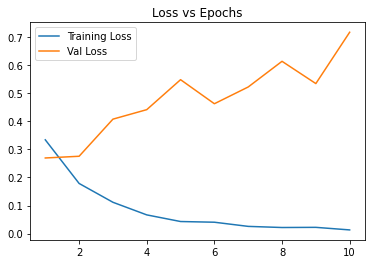

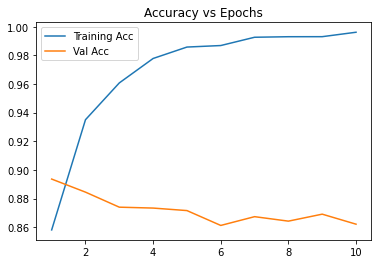

In [81]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc= hist.history['val_accuracy']


loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)
plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [82]:
model.load_weights("best_model.h5")

In [86]:
y_predicted=model.predict_classes(x_test)

In [87]:
y_predicted

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [90]:
y_predicted.shape

(10000, 1)

In [92]:
df = pd.DataFrame(data=y_predicted,columns=['label'])

In [95]:
rev={ 1: 'pos', 0: 'neg' }
df.label=[rev[item] for item in df.label]

In [96]:
df.head(7)

,label
0,neg
1,neg
2,neg
3,pos
4,pos
5,neg
6,pos


In [98]:
df.to_csv('y_predicted_using_complex_LSTM_with_callback_checkpoint.csv',index_label='Id')